,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
5,5.4,3.9,1.7,0.4,0.0,setosa
6,4.6,3.4,1.4,0.3,0.0,setosa
7,5.0,3.4,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
9,4.9,3.1,1.5,0.1,0.0,setosa


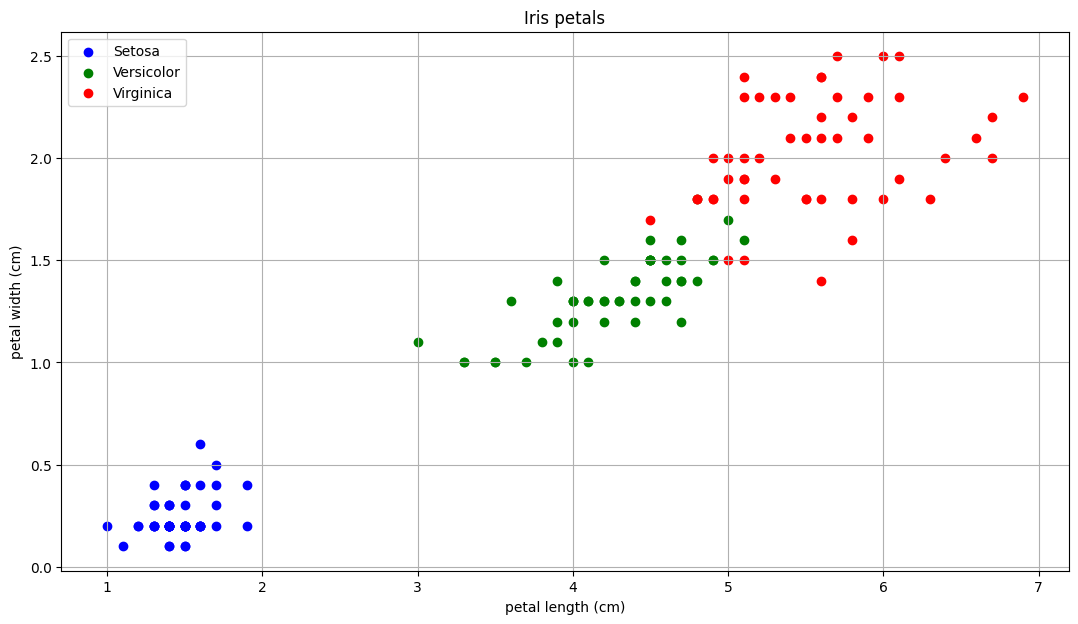

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd

#Dataset set up
iris = datasets.load_iris()
num_data = N = iris.data.shape[0]

iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

iris.head(10)

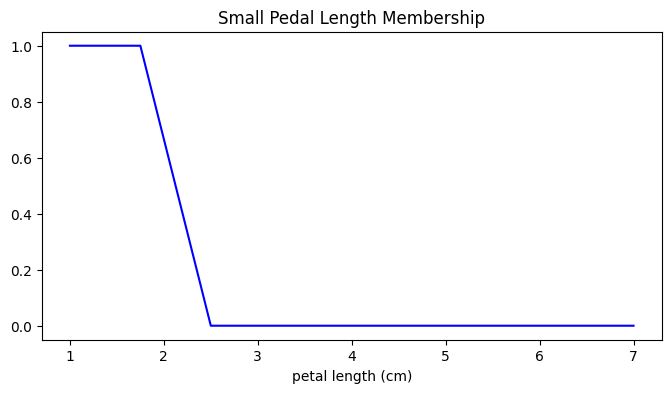

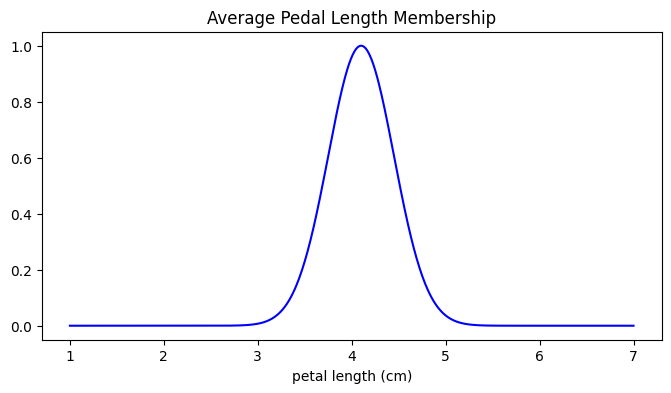

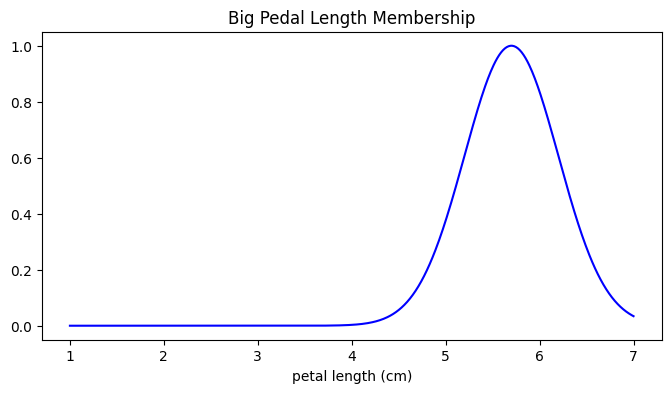

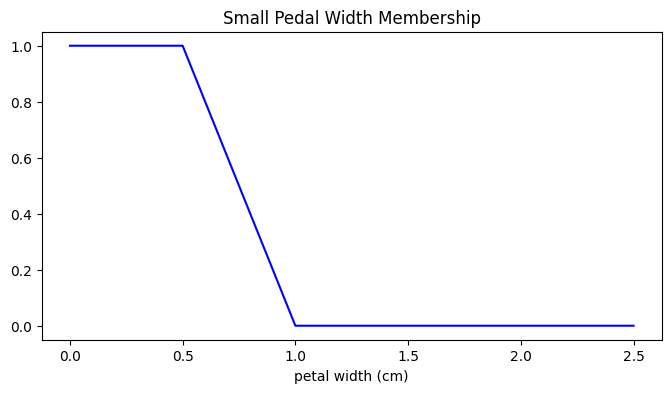

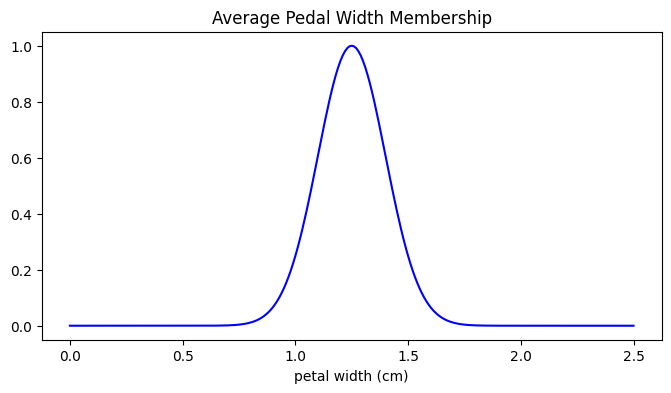

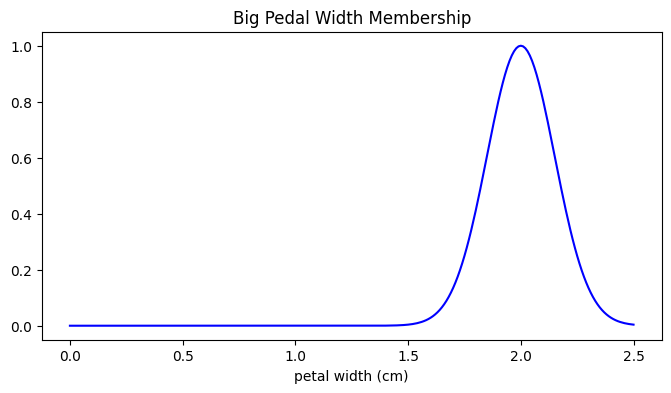

In [5]:
#Setting up memberships and rules
from memberships import GaussianMembership, Membership, TrapizoidalMembership, TriangleMembership
import fis
from fis import Rule

#Petal Length Anecedent Memberships
pedal_length_min = 1.0
pedal_length_max = 7.0

small_pedal_length = TrapizoidalMembership(pedal_length_min, pedal_length_max, [1.0,1.0, 1.75,2.5], x_step=0.25)
small_pedal_length.graph(title="Small Pedal Length Membership", x_label="petal length (cm)")
avg_pedal_length = GaussianMembership(pedal_length_min,pedal_length_max, 4.1, 0.35, x_step=0.01)
avg_pedal_length.graph(title="Average Pedal Length Membership", x_label="petal length (cm)")
big_pedal_length = GaussianMembership(pedal_length_min, pedal_length_max, 5.7, 0.5, x_step=0.01)
big_pedal_length.graph(title="Big Pedal Length Membership", x_label="petal length (cm)")

#Petal Width Anecedent Memberships
pedal_width_min = 0.0
pedal_width_max = 2.5

small_pedal_width = TrapizoidalMembership(pedal_width_min, pedal_width_max, [0.0,0.0, 0.5,1.0], x_step=0.125)
small_pedal_width.graph(title="Small Pedal Width Membership", x_label="petal width (cm)")
avg_pedal_width = GaussianMembership(pedal_width_min, pedal_width_max, 1.25, 0.15, x_step=0.01)
avg_pedal_width.graph(title="Average Pedal Width Membership", x_label="petal width (cm)")
big_pedal_width = GaussianMembership(pedal_width_min, pedal_width_max, 2.0, 0.15, x_step=0.01)
big_pedal_width.graph(title="Big Pedal Width Membership", x_label="petal width (cm)")

#Consequent Membership
#They are discrete; membership of 1 for the iris they represent, 0 elsewhere
domain_min = 0
domain_max = 2

setosa = Membership(domain_min, domain_max, mem_func=lambda x: x==0)
versicolor = Membership(domain_min, domain_max, mem_func=lambda x: x==1)
virginica = Membership(domain_min, domain_max, mem_func=lambda x: x==2)

#Rules to Identify Each Class
setosa_rule = Rule([small_pedal_length, small_pedal_width], setosa)
versicolor_rule = Rule([avg_pedal_length, avg_pedal_width], versicolor)
virginica_rule = Rule([big_pedal_length, big_pedal_width], virginica)

In [6]:
#Classification Test and Confusion Matrix
confusion = np.zeros((3,3))

for i in iris.index:
    petal_length = iris['petal length (cm)'].to_numpy()[i]
    petal_width = iris['petal width (cm)'].to_numpy()[i]

    min_memberships = [setosa_rule.evaluate([petal_length, petal_width]), 
                       versicolor_rule.evaluate([petal_length, petal_width]), 
                       virginica_rule.evaluate([petal_length, petal_width])]
    
    print(min_memberships)
    
    _, result = fis.Rule.defuzzify([setosa_rule, versicolor_rule,virginica_rule], min_memberships, dx=-1, aggregation_op="sum")
    
    target = int(iris['target'].to_numpy()[i])

    confusion[target][int(round(result,0))] += 1

    print(target, result, petal_length, petal_width)

print(confusion)
    

[1.0, 1.1954278659334803e-13, 5.380186160021062e-32]
0 1.1954278659333374e-13 1.4 0.2
[1.0, 1.1954278659334803e-13, 5.380186160021062e-32]
0 1.1954278659333374e-13 1.4 0.2
[1.0, 1.2664165549094176e-14, 5.380186160021062e-32]
0 1.2664165549094015e-14 1.3 0.2
[1.0, 1.0399622154910441e-12, 5.380186160021062e-32]
0 1.0399622154899625e-12 1.5 0.2
[1.0, 1.1954278659334803e-13, 5.380186160021062e-32]
0 1.1954278659333374e-13 1.4 0.2
[1.0, 6.160955882896885e-11, 1.9654838241636463e-25]
0 6.16095588251735e-11 1.7 0.4
[1.0, 1.1954278659334803e-13, 1.2842313672676196e-28]
0 1.19542786593334e-13 1.4 0.3
[1.0, 1.0399622154910441e-12, 5.380186160021062e-32]
0 1.0399622154899625e-12 1.5 0.2
[1.0, 1.1954278659334803e-13, 5.380186160021062e-32]
0 1.1954278659333374e-13 1.4 0.2
[1.0, 1.724120939035518e-13, 1.4452120129541253e-35]
0 1.724120939035221e-13 1.5 0.1
[1.0, 1.0399622154910441e-12, 5.380186160021062e-32]
0 1.0399622154899625e-12 1.5 0.2
[1.0, 8.337947094201192e-12, 5.380186160021062e-32]
0 8.33